# Assigment 5 - Bayesian Classifier and Gaussian Mixture Models

In the 5th assigment of the class we will study the Bayes Classifier.  

We will start with a quick demonstration of Gaussian Mixture Models with sklearn.

You have to implement two different variants of the bayes classifier using the assumption that the conditional probability P(x|y):
   1. Gaussian Bayes Classifier. P(x|y) ~ Gaussian Distribution (Normal)
   2. Gaussian Mixture Bayes Classifier. P(x|y) ~ Gaussian Mixture Model  

# A. Demonstration Gaussian mixture model

#### 1 . Probability density function (pdf) of Multivariate Gaussian Distribution:

$${ f_{\mathbf {X} }(x_{1},\ldots ,x_{k}; \mu,\Sigma)={\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}}$$


$$\Sigma \text{: is the covariance matrix} $$
$$\mu \text{: mean of the distribution} $$

In [290]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import numpy as np

# example of the multi variate normal distribution with scipy
mean = [0, 0]
cov = [[1,0],
       [0,1]]
dist = mvn(mean=mean, cov=cov)
x = [0, 0]
print("CDF:", dist.pdf(x))

CDF: 0.15915494309189535


#### 2. in the case of mixture of gaussian model the final Propability density fuction is as bellow:

$$f_{GMM}(x_{1},\ldots ,x_{k})= \sum_{i=1}^{k} w_k f_{\mathbf {X} }(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$


The model can be fit using the EM algorithm to find our parameters :
 1. $ w_k $ : weight of each gaussian, or the prior probability of the gaussian k, p(k)
 1. $ \mu_k $ : the mean of each the gaussian 
 1. $ \Sigma_k $: the covariance of each gaussian

lets generate some data

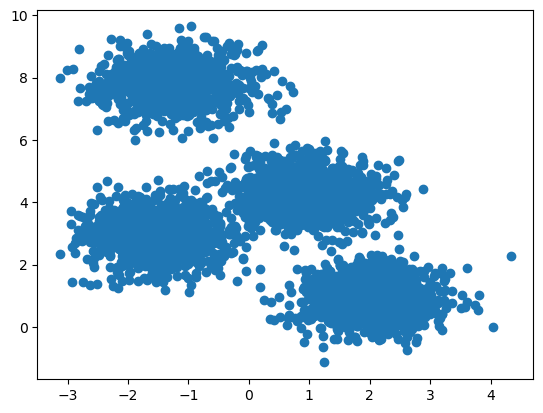

In [291]:
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt

# generate some data
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()
plt.close()

In [292]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

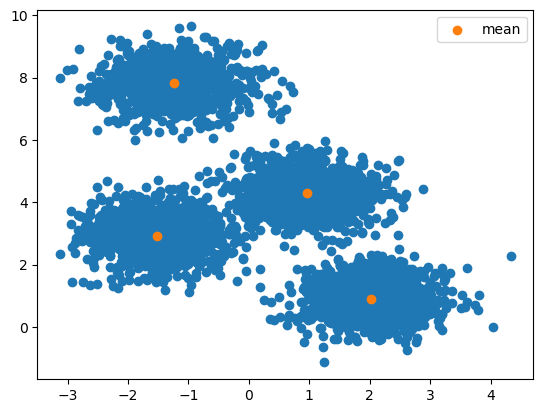

In [293]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], label = "mean")
plt.legend()
plt.show()
plt.close()

In [294]:
# weights of each Gaussian i.e p(k)
w_k = gmm.weights_
w_k

array([0.25010392, 0.24995563, 0.25065202, 0.24928842])

In [295]:
# mean of each gaussian
means = gmm.means_
means

array([[ 2.01630043,  0.90234062],
       [-1.23824476,  7.81555656],
       [-1.5205758 ,  2.92071074],
       [ 0.95919476,  4.29696274]])

In [296]:
# covariance of each gaussian
cov = gmm.covariances_
cov

array([[[ 0.3521316 , -0.00251558],
        [-0.00251558,  0.34816653]],

       [[ 0.37956024, -0.00096594],
        [-0.00096594,  0.33053861]],

       [[ 0.35307953, -0.00442887],
        [-0.00442887,  0.36458914]],

       [[ 0.34150938, -0.00421972],
        [-0.00421972,  0.34663498]]])

In [297]:
# the propability of p(k | x)
gmm.predict_proba(X)

array([[7.08701722e-10, 4.61018929e-19, 9.99998405e-01, 1.59444189e-06],
       [4.57355882e-38, 1.00000000e+00, 1.19436256e-12, 7.58871885e-13],
       [2.41914213e-04, 2.16336398e-21, 9.99223598e-01, 5.34487544e-04],
       ...,
       [1.00000000e+00, 1.04008839e-46, 2.67613974e-13, 1.48901568e-12],
       [6.96553464e-08, 7.44482445e-20, 9.99985949e-01, 1.39815406e-05],
       [9.99999967e-01, 3.37134949e-38, 2.17668488e-14, 3.25121456e-08]])

# Propability Density Function of Gaussian Mixture Model

$$f_{GMM}(x_{1},\ldots ,x_{k})= \sum_{i=1}^{k} w_k f_{\mathbf {X} }(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$

In [298]:
# pdf of gmm
x = (0, 0)

def pdf_mixture(x, w, means, cov):
    n_componets = len(means)
    p_x = 0
    for k in range(n_componets):
        p_x += w[k] * mvn(mean=means[k], cov=cov[k]).pdf(x)
    return p_x

In [299]:
pdf_mixture(x, w_k,  means, cov)

0.00010584089218250922

In [300]:
# notes 1.  if we use covariance_type="diag" the covariance matrix is diagonal

In [301]:
gmm = GaussianMixture(n_components=4, random_state=0, covariance_type="diag")
gmm.fit(X)

GaussianMixture(covariance_type='diag', n_components=4, random_state=0)

In [302]:
# so the cov in a list with the components of the diagonal
gmm.covariances_

array([[0.35306517, 0.36506761],
       [0.37956783, 0.33056489],
       [0.35218237, 0.34835942],
       [0.34120551, 0.34680435]])

In [303]:
# the covariance in case of full matrix
cov

array([[[ 0.3521316 , -0.00251558],
        [-0.00251558,  0.34816653]],

       [[ 0.37956024, -0.00096594],
        [-0.00096594,  0.33053861]],

       [[ 0.35307953, -0.00442887],
        [-0.00442887,  0.36458914]],

       [[ 0.34150938, -0.00421972],
        [-0.00421972,  0.34663498]]])

# Step 1. Bayesian Classifier with Gaussian Model

We begin with the implementation of the Gaussian Naive Bayes Classifier.

In the naive Bayes Classifier you have to calculate:
1. the prior for each class p(y)
2. the parameters of the gaussian distribution for each class y in order to model p(x|y) according to their empirical values

After obtaining the parameter we can get the posterior. The final prediction of our model can be the class with the maximum posterior.

Fill the class below and use it to:   
1. fit your model using .fit() method
2. get the propabilities of each class for the different X using .predict_proba() method
3. make the final predictions using the .predict() method and calculate the accuracy of your model

In [304]:
class GaussianNaiveBayesClassifier:
    """
    Implementation of Naive Bayes Classifier
    """

    def __init__(self):
        # initialization of required variables.
        self.models = [] # p(x|y)
        self.prior = [] # p(y)
        self.n_classes = None
        self.n_features = None

    def fit(self, X, y):
        """
        Calculate the parameters of the gaussian models for each class i.e P(x|y), as well as the prior class probabilities P(y).
        :param X: The input features
        :param y: The labels
        :return: nothing
        """
        self.n_features = X.shape[1]
        classes = set(y)
        self.n_classes = len(classes)

        self.models = [] # np.zeros(shape=(1, self.n_classes))
        for class_y in range(self.n_classes):
            # Calculate the prior P(y) for each class
            # y == class_y is an array of boolean values where each element is True if the class label matches class_y and False otherwise.
            prior_y = np.mean(y == class_y)
            self.prior.append(prior_y)
            # Calculate the different model P(x|y) by finding the parameters of the gaussian for each class
            # X[y == class_y] selects only the examples from the matrix X for which the class labels match class_y
            # Compute the mean along axis 0 (the rows of the matrix)
            empirical_mean_y = np.mean(X[y == class_y], axis=0)

            #print("mean : ", empirical_mean_y)

            empirical_std_y = np.std(X[y == class_y], axis=0)
            #print("std : ", empirical_std_y)
            
            model = (empirical_mean_y, empirical_std_y)
            self.models.append(model)

    def predict_proba(self, X):
        """
        Calculate the posterior probability of each class given the features, i.e. P(y|x).
        You can calculate this with Bayes's theorem:
                    P(y|x) = P(x|y) P(y) / P(x).
                    P(y|x): The Posterior probability
                    P(x|y): The Likelihood probability
                    P(y): Prior probability
                    P(x): The evidence \sum_{y'} P(x|y') P(y')
        :param X:
        :return:
        """
        n_examples = X.shape[0]
        posterior = np.zeros([self.n_classes, n_examples])
        ## FILL IN

        '''
        As the evidence is not dependent of the class I will not use it. I will consider that posterior is proportional to P(x|y) P(y)
        '''

        for y_index in range(self.n_classes):
            mean, std = self.models[y_index]

            likelihood = np.prod(1 / (np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * ((X - mean) / std) ** 2), axis=1)

            prior = self.prior[y_index]

            posterior[y_index, :] = likelihood * prior

        return posterior

    def predict(self, X):
        """
        Make predicted class with the maximum posterior P(y|x)
        :param X:
        :return: the predicted class
        hint: use the predict_proba class
        """
        posterior = self.predict_proba(X)
        prediction = np.argmax(posterior, axis=0)
        return prediction

In [305]:
# lets generate some to use to train our models
centers = [(-10,5), (0,0),(0,10), (-7,10)]
X_y_0, _ = make_blobs(n_samples=4000, centers=centers, cluster_std=1.00, random_state=0)
centers = [(-5,5), (-5,-2)]
X_y_1, _ = make_blobs(n_samples=2000, centers=centers, cluster_std=1.00, random_state=0)
X = np.concatenate([X_y_0, X_y_1],axis=0)

'''
[[-10.0617433    4.55316375]
 [ -8.70638214   9.83974454]
 [ -6.54115852  10.60690886]
 ...
 [ -5.65855297   4.48576603]
 [ -4.07049489   5.58222459]
 [ -3.94097275   3.97743561]]
'''
Y = np.concatenate([[0]*4000, [1]*2000],axis=0)
'''
[0 0 0 ... 1 1 1]
'''


'\n[0 0 0 ... 1 1 1]\n'

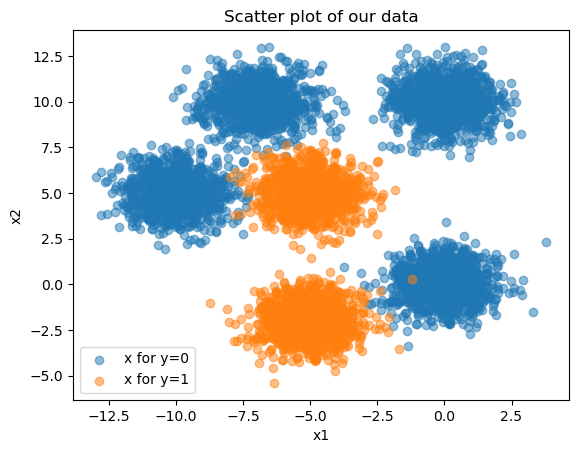

In [306]:
# plt.scatter(X[:,0], X[:,1], color =["r" if y == 1 else "g" for y in Y], alpha = 0.5)
plt.figure()
plt.title("Scatter plot of our data")
plt.scatter(X_y_0[:,0], X_y_0[:,1], alpha = 0.5, label = "x for y=0")
plt.scatter(X_y_1[:,0], X_y_1[:,1], alpha = 0.5, label = "x for y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [307]:
model = GaussianNaiveBayesClassifier()

model.fit(X, Y)

probs = model.predict_proba(X)

predictions = model.predict(X)

accuracy = np.mean(predictions == Y)
print("Accuracy:", accuracy)

print(model.models)


Accuracy: 0.9421666666666667
[(array([-4.26716243,  6.24015036]), array([4.47942562, 4.25629003])), (array([-5.04437158,  1.49346611]), array([0.98327778, 3.63140022]))]


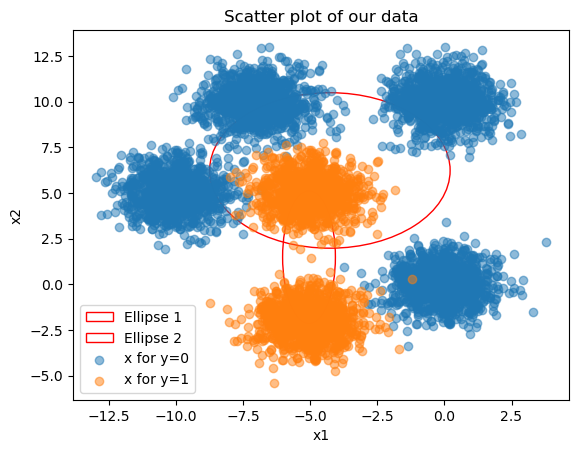

In [308]:
from matplotlib.patches import Ellipse

data = model.models

fig, ax = plt.subplots()
ax.set_title("Scatter plot of our data")

for i, (mean, std_dev) in enumerate(data):
    x, y = mean
    width, height = std_dev

    ellipse = Ellipse((x, y), width * 2, height * 2, fill=False, color='red', alpha=1, label=f'Ellipse {i + 1}')
    ax.add_patch(ellipse)

ax.scatter(X_y_0[:, 0], X_y_0[:, 1], alpha=0.5, label="x for y=0")
ax.scatter(X_y_1[:, 0], X_y_1[:, 1], alpha=0.5, label="x for y=1")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
plt.show()

# Step 2.  Bayesian Classifier with Gaussian mixture model

Implement the Bayesian Classifier with Gaussian mixture model.
The model is as before, but instead of using the Gaussian Distribution to model the P(x|y) for each class, we use a mixture of Gaussian's.

So you have to find the parameters of a GMM ($w_k$, $m_k$, $cov_k$) for each different y.  
note: To fit the gmm of each class y you can use the sklearn as we demonstrate before

Fill the class below and use it to get:  
1. fit your model using .fit() method
2. the propabilities of each class for the different x using .predict_proba() method
3. make the final predictions using the .predict() method and calculate the accuracy of your model
4. compare the result with the gaussian bayes classifier

In [309]:
def bics(X):
    n_components = np.arange(1, 11)  # Define a range of possible component numbers
    bics = []  # Store BIC values for different numbers of components

    for n in n_components:
        gmm = GaussianMixture(n_components=n)
        gmm.fit(X)
        bics.append(gmm.bic(X))

    # Find the number of components that minimizes BIC
    best_n_components = n_components[np.argmin(bics)]
    return best_n_components

In [310]:
def pdf_mixture(X, w, means, cov):
    n_components = len(means)
    p_x = np.zeros(X.shape[0])
    
    for k in range(n_components):
        p_x += w[k] * mvn.pdf(X, mean=means[k], cov=cov[k])
    
    return p_x

In [311]:
class GaussianMixtureNaiveBayesClassifier:
    """
    Implementation of Gaussian Mixture Naive Bayes Classifier
    """

    def __init__(self):
        # initialization of required variables.
        self.models = [] # p(x|y)
        self.prior = [] # p(y)
        self.n_classes = None
        self.n_features = None

    def fit(self, X, y):
        """
        Calculate the parameters of the gaussian mixture model for each class i.e P(x|y), as well as the prior class probabilities P(y).
        :param X: The input features
        :param y: The labels
        :return: nothing
        """
        self.n_features = X.shape[1]
        classes = set(y)
        self.n_classes = len(set(y))

        self.models = [] # np.zeros(shape=(1, self.n_classes))
        for class_y in range(self.n_classes):
            # Calculate the prior P(y) for each class
            prior_y = np.mean(y == class_y)
            self.prior.append(prior_y)
            
            print(bics(X[y == class_y]))

            # Calculate the different model P(x|y) by finding the parameters of the mixture of gaussians for each class
            gmm = GaussianMixture(n_components=bics(X[y == class_y]))
            gmm.fit(X[y == class_y])
            self.models.append((gmm.weights_, gmm.means_, gmm.covariances_))

    def predict_proba(self, X):
        """
        Calculate the posterior probability of each class given the features, i.e. P(y|x).
        You can calculate this with Bayes's theorem:
                    P(y|x) = P(x|y) P(y) / P(x).
                    P(y|x): The Posterior probability
                    P(x|y): The Likelihood probability
                    P(y): Prior probability
                    P(x): The evidence \sum_{y'} P(x|y') P(y')
        :param X:
        :return:
        """
        n_examples = X.shape[0]
        posterior = np.zeros([self.n_classes, n_examples])
        # fill your code
        for y_index in range(self.n_classes):
            W, M, C = self.models[y_index]
            likelihood = pdf_mixture(X, W, M, C)  # Utilisez la fonction pdf_mixture
            posterior[y_index] = likelihood * self.prior[y_index]
        return posterior

    def predict(self, X):
        """
        Make predicted class with the maximum posterior P(y|x)
        :param X:
        :return: the predicted class
        hint: use the predict_proba class
        """
        # fill your code
        posterior = self.predict_proba(X)
        predictions = np.argmax(posterior, axis=0)
        return predictions

In [312]:
model = GaussianMixtureNaiveBayesClassifier()
model.fit(X, Y)

probs = model.predict_proba(X)

predictions = model.predict(X)

accuracy = np.mean(predictions == Y)
print("Accuracy:", accuracy)

#print(model.models)

4
2
Accuracy: 0.9961666666666666


[[-1.00183873e+01  4.99595044e+00]
 [-1.49850515e-03  1.00095459e+01]
 [-6.70066713e-02 -3.16448973e-03]
 [-6.97668410e+00  9.96930978e+00]]
[[-5.06706084 -2.0043849 ]
 [-5.02169895  4.98875303]]


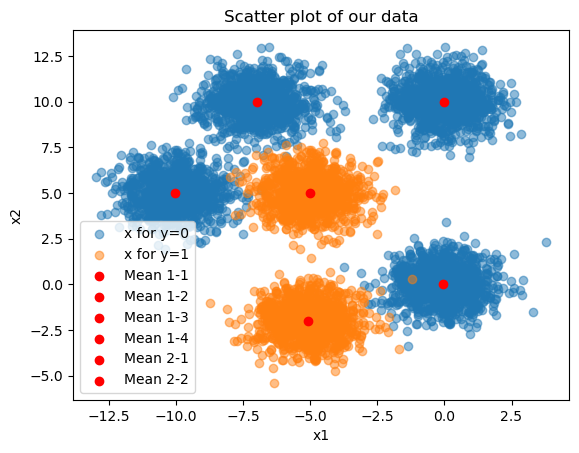

In [313]:
import numpy as np

# Votre code pour obtenir les données X_y_0 et X_y_1

# Créez une nouvelle figure
plt.figure()
plt.title("Scatter plot of our data")

# Tracer les points de X_y_0 et X_y_1
plt.scatter(X_y_0[:,0], X_y_0[:,1], alpha=0.5, label="x for y=0")
plt.scatter(X_y_1[:,0], X_y_1[:,1], alpha=0.5, label="x for y=1")

# Accédez aux modèles de mélange gaussien
data = model.models

# Tracez les moyennes
for i, (weights, means, covariances) in enumerate(data):
    print(means)
    for j in range(len(means)):
        x, y = means[j]
        plt.scatter(x, y, c='red', marker='o', label=f'Mean {i + 1}-{j + 1}')

# Configurez les étiquettes et affichez le plot
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()